In [1]:
%%time
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

CPU times: total: 1.62 s
Wall time: 2.66 s


In [2]:
%%time
df=pd.read_csv('outcome.csv')

CPU times: total: 484 ms
Wall time: 480 ms


In [3]:
del df['Unnamed: 0']
df['ZIP CODE'] = df['ZIP CODE'].astype('object')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('object')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['BOROUGH'] = df['BOROUGH'].astype('category')
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].astype('category')
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].astype('category')
df['TAX CLASS AS OF FINAL ROLL 18/19'] = df['TAX CLASS AS OF FINAL ROLL 18/19'].astype('category')
df['BUILDING CLASS AS OF FINAL ROLL 18/19'] = df['BUILDING CLASS AS OF FINAL ROLL 18/19'].astype('category')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['BUILDING CLASS AT TIME OF SALE'] = df['BUILDING CLASS AT TIME OF SALE'].astype('category')
df['ZIP CODE'] = df['ZIP CODE'].astype('category')

In [4]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178983 entries, 0 to 178982
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   BOROUGH                                178983 non-null  category      
 1   NEIGHBORHOOD                           178983 non-null  category      
 2   BUILDING CLASS CATEGORY                178983 non-null  category      
 3   TAX CLASS AS OF FINAL ROLL 18/19       178983 non-null  category      
 4   BUILDING CLASS AS OF FINAL ROLL 18/19  178983 non-null  category      
 5   ZIP CODE                               178983 non-null  category      
 6   RESIDENTIAL UNITS                      178983 non-null  int64         
 7   COMMERCIAL UNITS                       178983 non-null  int64         
 8   TOTAL UNITS                            178983 non-null  int64         
 9   LAND SQUARE FEET                       178983 no

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AS OF FINAL ROLL 18/19',
       'BUILDING CLASS AS OF FINAL ROLL 18/19', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'log_Sale_Price', 'ft_price',
       'log_ft_price'],
      dtype='object')

# correlation plot

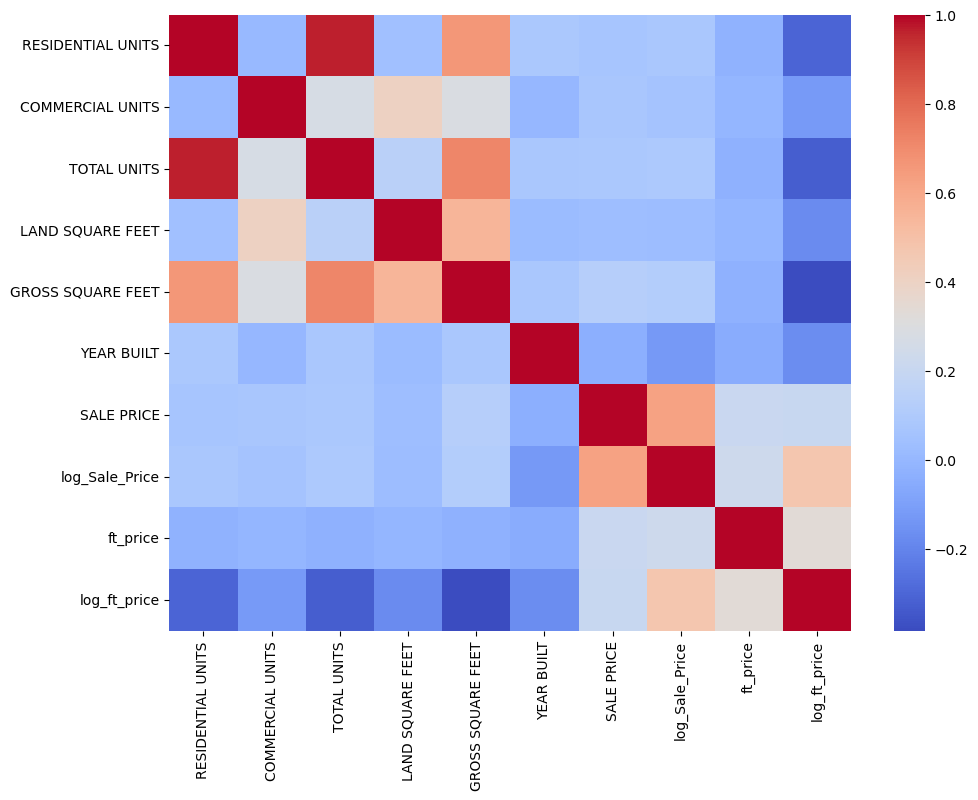

CPU times: total: 1.5 s
Wall time: 1.58 s


In [5]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="coolwarm",annot=False)
plt.show()

# dummy variable generation

In [6]:
%%time
df.shape

CPU times: total: 0 ns
Wall time: 0 ns


(178983, 19)

In [7]:
%%time
df_dummies = pd.get_dummies(df)
df_dummies = df_dummies.dropna()
df_dummies.shape

CPU times: total: 1.62 s
Wall time: 1.63 s


(178981, 746)

# train_test_split

In [8]:
%%time
df_dummies = df_dummies.reset_index()
x = df_dummies.drop(['SALE PRICE','log_Sale_Price','ft_price','log_ft_price'], axis=1)
y = df_dummies['log_Sale_Price']
del x['index']
del x['SALE DATE']
# unstandardized + dummies
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 123)

CPU times: total: 906 ms
Wall time: 883 ms


In [9]:
y_test

91855     13.962391
65597     14.330099
83000     13.321214
65136     13.698977
169327    13.370785
            ...    
102678    14.343193
80911     13.384006
147981    14.041849
137478    13.234643
144108    13.857026
Name: log_Sale_Price, Length: 53695, dtype: float64

# standardized numerical variables

In [10]:
%%time
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# standardized numerical + dummies
scale_x = StandardScaler()
x_train_stan = x_train.copy()
y_train_stan = y_train.copy()
x_test_stan = x_test.copy()
y_test_stan = y_test.copy()


x_train_num = x_train_stan[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET','YEAR BUILT']]
x_train_num_scale = scale_x.fit_transform(x_train_num)

x_train_stan[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET','YEAR BUILT']] = x_train_num_scale

x_test_num = x_test_stan[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET','YEAR BUILT']]

x_test_num_scale = scale_x.transform(x_test_num)

x_test_stan[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET','YEAR BUILT']] = x_test_num_scale

scale_y = StandardScaler()
y_train_stan = scale_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
y_test_stan = scale_y.transform(np.array(y_test).reshape(-1,1)).ravel()

CPU times: total: 78.1 ms
Wall time: 72.4 ms


调用CPU加速包

In [11]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
%%time
# 创建线性回归模型对象
model = LinearRegression()
# 拟合模型
model.fit(x_train_stan, y_train_stan)
# 打印模型截距和系数
# print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)

CPU times: total: 1min 11s
Wall time: 19.3 s


LinearRegression()

In [14]:
predicted_price = model.predict(x_test)
print('Predicted Price:', predicted_price)

Predicted Price: [-1.12473659e+09 -1.68710500e+09 -5.62368290e+08 ... -1.12473661e+09
 -1.12473664e+09 -1.68710493e+09]


In [15]:
%%time
# Define a function that compares all final models
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
def final_comparison(models, test_features, test_labels):
    scores = pd.DataFrame()
    for model in models:
        predictions = model.predict(test_features)
        mae = round(mean_absolute_error(test_labels, predictions), 4)
        mse = round(mean_squared_error(test_labels, predictions), 4)
        rmse = sqrt(round(mean_squared_error(test_labels, predictions), 4))
        r2 = round(r2_score(test_labels, predictions), 4)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = round(100 - mape, 4)
        scores[str(model)] = [mae, mse, rmse, r2, accuracy]
    scores.index = ['Mean Absolute Error', 'Mean Squared Error','Root Mean Squared Error', 'R^2', 'Accuracy']
    return scores

CPU times: total: 0 ns
Wall time: 0 ns


In [16]:
%%time
lr_scores =  final_comparison([model], x_test, y_test)
lr_scores.columns  = ['Linear Regression']

CPU times: total: 406 ms
Wall time: 296 ms


In [17]:
lr_scores

,Linear Regression
Mean Absolute Error,5.590545e+09
Mean Squared Error,3.975033e+21
Root Mean Squared Error,6.304787e+10
R^2,-7.267400e+21
Accuracy,-3.859524e+10


In [18]:
coefs = pd.DataFrame({
    'Feature': x_train.columns,
    'Coef': model.coef_
})
coefs = coefs.sort_values('Coef', ascending=False)
print(coefs)

                                             Feature          Coef
615                BUILDING CLASS AT TIME OF SALE_C0  2.870723e+11
268               TAX CLASS AS OF FINAL ROLL 18/19_1  2.318155e+11
242  BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS  1.152527e+11
608                BUILDING CLASS AT TIME OF SALE_A6  3.853120e+10
720                BUILDING CLASS AT TIME OF SALE_S1  3.853120e+10
..                                               ...           ...
276         BUILDING CLASS AS OF FINAL ROLL 18/19_A2 -4.575767e+11
274         BUILDING CLASS AS OF FINAL ROLL 18/19_A0 -4.575767e+11
393         BUILDING CLASS AS OF FINAL ROLL 18/19_S1 -4.575767e+11
280         BUILDING CLASS AS OF FINAL ROLL 18/19_A6 -4.575767e+11
315         BUILDING CLASS AS OF FINAL ROLL 18/19_G0 -4.575767e+11

[741 rows x 2 columns]
